### Problem 1
Implement coordinate descent with analytic line search for Matyas function:
$$f(x,y) = 0.26(x^2 + y^2) - 0.48xy$$
on the interval $[-10;10] \times [-10;10]$. Plot the behavior of the optimization process on the contour map of the function. 

Useful function: `pyplot.contourf`, `np.meshgrid`

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def f(x, y):
    return 0.26*(x**2 + y**2) - 0.48*x*y

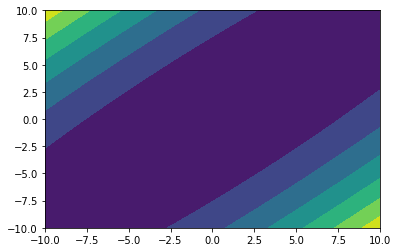

In [6]:
x_base = np.linspace(-10, 10, 100)
y_base = np.linspace(-10, 10, 100)

xx, yy = np.meshgrid(x_base, y_base, sparse=True)
z = f(xx, yy)

plt.contourf(x_base, y_base, z)
plt.show()

In [11]:
def analytic_linear_search(p, d):
    x, y = p[0], p[1]
    dx, dy = d[0], d[1]
    gamma = (-13*x*dx - 13*y*dy + 12*x*dy + 12*y*dx)/(13*dx**2 + 13*dy**2 - 24*dx*dy)
    return np.array([x + gamma*dx, y+gamma*dy])

In [15]:
epsilon = 1e-5
p = np.array([np.random.uniform(-10, 10), np.random.uniform(-10, 10)])

log = [p]

for i in range(1000):
    d = np.array([1, 0])
    p_new = analytic_linear_search(p, d)
    log.append(p_new)
    p = p_new.copy()
    d = np.array([0, 1])
    p_new = analytic_linear_search(p, d)
    log.append(p_new)
    p = p_new.copy()
    
    dist = np.sqrt(np.sum((log[-1] - log[-2])**2))
    if dist < epsilon:
        break

139 [5.88475872e-05 5.43208497e-05] 1.3319378908129843e-10


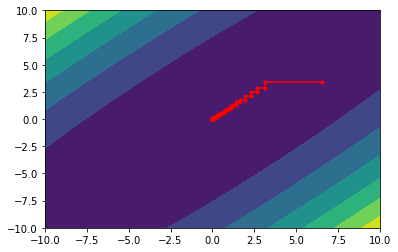

In [16]:
print(len(log), log[-1], f(log[-1][0], log[-1][1]))

log = np.array(log)
plt.plot(log[:,0], log[:,1], 'r.-')
plt.contourf(x_base, y_base, z)
plt.show()

### Problem 2
Implement gradient descent with momentum for Matyas function with analytical and approximated gradient:
$$f(x,y) = 0.26(x^2 + y^2) - 0.48xy$$
on the interval $[-10;10] \times [-10;10]$. Plot the behavior of the optimization process on the contour map of the function. Compare with regular gradient descent.

Useful function: `pyplot.contour`, `np.meshgrid`

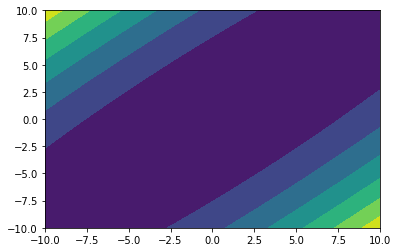

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as la

def f(x, y):
    return 0.26*(x**2 + y**2) - 0.48*x*y

x_base = np.linspace(-10, 10, 100)
y_base = np.linspace(-10, 10, 100)

xx, yy = np.meshgrid(x_base, y_base, sparse=True)
z = f(xx, yy)

plt.contourf(x_base, y_base, z)
plt.show()

In [22]:
def f_grad(p):
    x, y = p[0], p[1]
    return np.array([0.52*x - 0.48*y, 0.52*y - 0.48*x])

In [19]:
p = np.array([np.random.uniform(-10, 10), np.random.uniform(-10, 10)])

In [23]:
def SGD(p, lr=0.1, gamma=0.9, epsilon=1e-5):
    log = [p]
    v = np.array([0, 0])

    for i in range(1000):
        df = f_grad(p)
        v = gamma*v + lr*df
        p = p - v
        log.append(p)
        
        dist = np.sqrt(np.sum((log[-1] - log[-2])**2))
        if dist < epsilon:
            break

    log = np.array(log)
    
    print(len(log), log[-1], f(log[-1][0], log[-1][1]))
    log = np.array(log)
    plt.plot(log[:,0], log[:,1], 'r.-')
    plt.contourf(x_base, y_base, z)
    plt.show()

167 [-0.00037794 -0.00058913] 2.0502742213407356e-08


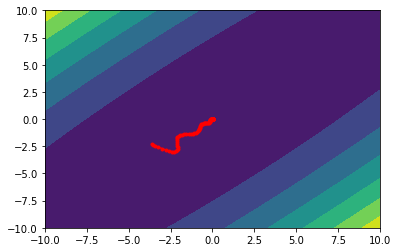

In [43]:
SGD(p, gamma=0.9)

1001 [-0.05390634 -0.05390634] 0.00011623575360371601


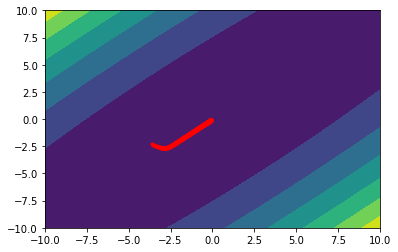

In [39]:
SGD(p, gamma=0)

### Problem 3
Implement Newton method for McCormick function ([link](https://www.sfu.ca/~ssurjano/mccorm.html)):
$$f(x,y) = \sin(x+y) + (x-y)^2-1.5x+2.5y+1$$
on the interval $[-1.5;4] \times [-3;4]$. Plot the behavior of the optimization process on the contour map of the function. Select starting point randomly as in previous problems. Compare to steepest gradient descent on the same function.

In [44]:
def f(x, y):
    return np.sin(x+y) + (x-y)**2 -1.5*x +2.5*y +1
    
def grad_f(x, y):
    return np.array([np.cos(x+y)+2*(x-y)-1.5,
                    np.cos(x+y)+2*(y-x)+2.5])

def hessian_f(x, y):
    return np.array([[-np.sin(x+y)+2, -np.sin(x+y)-2],
                    [-np.sin(x+y)-2, -np.sin(x+y)+2]])

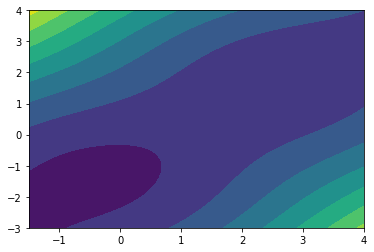

In [45]:
x_min, x_max = -1.5, 4
y_min, y_max = -3, 4

x_base = np.linspace(x_min, x_max, 100)
y_base = np.linspace(y_min, y_max, 100)

xx, yy = np.meshgrid(x_base, y_base, sparse=True)
z = f(xx, yy)
plt.contourf(x_base, y_base, z)
plt.show()

In [46]:
x0 = np.array([np.random.uniform(x_min, x_max, 1), np.random.uniform(y_min, y_max, 1)]).reshape((2,))

In [47]:
def line_search_golden_ratio(x, d):
    # find intersection with interval borders
    if d[0]!=0 and (x_min - x[0])/d[0] > 0:
        alpha = (x_min - x[0])/d[0]
    else:
        alpha = 1e10
    if d[1]!=0 and (y_min - x[1])/d[1] > 0:
        alpha = min(alpha, (y_min - x[1])/d[1])
    if d[0]!=0 and (x_max - x[0])/d[0] > 0:
        alpha = min(alpha, x_max - x[0])/d[0]
    if d[1]!=0 and (y_max - x[1])/d[1] > 0:
        alpha = min(alpha, (y_max - x[1])/d[1])
    # from now on we search in the interval [0, a]
    left, right = 0, alpha
    tau = (1+np.sqrt(5))/2
    while np.abs(right-left) > 1e-5:
        a = left + (right - left)*(2-tau)
        b = left + (right - left)*(tau-1)
        # we need to calculate -f because the search method is 
        f_a = -f(x[0]+a*d[0], x[1]+a*d[1])
        f_b = -f(x[0]+b*d[0], x[1]+b*d[1])
        if f_a == f_b:
            left, right = a, b
        if f_a > f_b:
            right = b
        if f_a < f_b:
            left = a
    return x + (left+right)/2 * d

In [50]:
x_prev = x0.copy()
opt_trajectory = [x_prev]
lr = 0.1
for i in range(1000):
    H = hessian_f(x_prev[0], x_prev[1])
    grad = grad_f(x_prev[0], x_prev[1])
    x_next = line_search_golden_ratio(x_prev, -(la.inv(H)@grad))
    x_prev = x_next.copy()
    opt_trajectory.append(x_prev.copy())
    
    if np.abs(f(opt_trajectory[-1][0], opt_trajectory[-1][1])-f(opt_trajectory[-2][0], opt_trajectory[-2][1]))<1e-7:
        break

In [51]:
x_prev = x0.copy()
gd_opt_trajectory = [x_prev]
lr = 0.1

for i in range(1000):
    grad = grad_f(x_prev[0], x_prev[1])
    x_next = line_search_golden_ratio(x_prev, -grad)
    
    x_prev = x_next.copy()
    gd_opt_trajectory.append(x_prev.copy())
    
    if np.abs(f(gd_opt_trajectory[-1][0], gd_opt_trajectory[-1][1])-f(gd_opt_trajectory[-2][0], gd_opt_trajectory[-2][1]))<1e-7:
        break

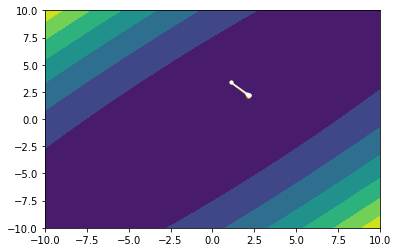

In [52]:
plt.contourf(x_base, y_base, z)
plt.plot(np.array(opt_trajectory)[:,0], np.array(opt_trajectory)[:,1], 'y.-')
plt.plot(np.array(gd_opt_trajectory)[:,0], np.array(gd_opt_trajectory)[:,1], 'w.-')
plt.show()

In [54]:
print(len(gd_opt_trajectory), gd_opt_trajectory[-1], f(gd_opt_trajectory[-1][0], gd_opt_trajectory[-1][1]))

5 [2.19527313 2.18022096] 0.19150612709073123


In [55]:
print(len(opt_trajectory), opt_trajectory[-1], f(opt_trajectory[-1][0], opt_trajectory[-1][1]))

4 [2.15148691 2.13487693] 0.18379812310735133


### Problem 4
Implement gradient descent with Golden Ratio line search for Goldstein–Price function:
$$f(x,y)=\left[1+\left(x+y+1\right)^{2}\left(19-14x+3x^{2}-14y+6xy+3y^{2}\right)\right]
\left[30+\left(2x-3y\right)^{2}\left(18-32x+12x^{2}+48y-36xy+27y^{2}\right)\right]$$
on the interval $[-10;10] \times [-10;10]$. Plot the behavior of the optimization process on the contour map of the function. Find gradients using finite difference approximation.

Useful function: `pyplot.contour`, `np.meshgrid`

### Problem 5
Implement gradient descent with Golden Ratio line search for Goldstein–Price function:
$$f(x,y)=\left[1+\left(x+y+1\right)^{2}\left(19-14x+3x^{2}-14y+6xy+3y^{2}\right)\right]
\left[30+\left(2x-3y\right)^{2}\left(18-32x+12x^{2}+48y-36xy+27y^{2}\right)\right]$$
on the interval $[-10;10] \times [-10;10]$. Plot the behavior of the optimization process on the contour map of the function. Find gradients analytically.

Useful function: `pyplot.contour`, `np.meshgrid`

### Problem 6
Implement coordinate descent with Nesterov momentum for McCormick function ([link](https://www.sfu.ca/~ssurjano/mccorm.html)):
$$f(x,y) = \sin(x+y) + (x-y)^2-1.5x+2.5y+1$$
on the interval $[-1.5;4] \times [-3;4]$. Plot the behavior of the optimization process on the contour map of the function. Select starting point randomly as in previous problems.

Useful function: `pyplot.contour`, `np.meshgrid`